In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.image as mpimg
from skimage import data, color, io, filters, morphology,transform, exposure, feature
from scipy import ndimage
from skimage.io import imread, imshow
from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

##  Clustering

Een supermarkt verzamelde een aantal gegevens van zijn klanten. Deze gegevens wil de supermarkt gebruiken om zijn klanten beter in kaart te brengen. 
Daarvoor wil het clustering toepassen. Op deze manier worden klanten met een gelijkaardig profiel samen gegroepeerd. Dit maakt het mogelijk voor de supermarkt om per cluster van klanten doelgerichter promoties te kunnen aanbieden.

De gegevens kan je vinden in het bestand 'customer.csv'. 

In [2]:
dataset = pd.read_csv('./sensors_data_test_project.csv')
dataset.head()

,RackId,RackRow,WeightPre,WeightPost,WeightDiff,DistMin,DistMax,DistAvg,DistTime,DayTime
0,3,1,60,50,2,1,40,10,3,12/25/1924
1,2,2,38,80,3,1,40,19,4,6:00
2,3,1,40,50,1,1,40,23,4,6:30
3,2,2,88,80,5,1,1,40,6,7:00
4,1,2,65,80,1,1,40,28,2,7:01


### Analyse van de data

In [3]:
# Verwijderen van DayTime


dataset.drop('DayTime',axis=1,inplace=True)

dataset.head()

,RackId,RackRow,WeightPre,WeightPost,WeightDiff,DistMin,DistMax,DistAvg,DistTime
0,3,1,60,50,2,1,40,10,3
1,2,2,38,80,3,1,40,19,4
2,3,1,40,50,1,1,40,23,4
3,2,2,88,80,5,1,1,40,6
4,1,2,65,80,1,1,40,28,2


Onderzoek de verdeling per geslacht. Wat is de verhouding van mannelijke klanten ten opzichte van vrouwelijke klanten? Gebruik hiervoor de seaborn countplot.

<AxesSubplot:xlabel='DistAvg', ylabel='count'>

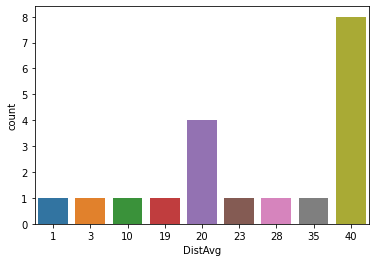

In [4]:
# Verdeling van  DistAvg


# Onderzoek in welke mate de dataset gebalanceerd is.

sns.countplot(x='DistAvg',data=dataset)


Ga na of vrouwen meer geld lijken te spenderen dan mannen. Visualiseer dit met een boxplot.

In [5]:
# Boxplot van spending volgens geslacht


sns.boxplot(x='DistAvg',y='Spending_Score',data=dataset,orient='v')


ValueError: Could not interpret input 'Spending_Score'

In [ ]:
# Vervang male door 0 en female door 1
dataset.replace({'Gender': {'Male': 0, 'Female': 1}},inplace=True)
dataset.head()

Teken de histogrammen van Age, Income en Spending score. Je kan hiervoor de seaborn distplot gebruiken. Zijn deze normaal verdeeld? 

In [ ]:
# Distributie van de Age, Income en Spending_Score



plt.figure(1 , figsize = (15 , 6))
plt.subplot(1 , 3 , 1)
sns.distplot(dataset['Age'],bins=15,axlabel='Age')
plt.subplot(1 , 3 , 2)
sns.distplot(dataset['Annual_Income'],bins=15,axlabel='Annual Income')
plt.subplot(1 , 3 , 3)
sns.distplot(dataset['Spending_Score'],bins=15,axlabel='Spending Score')


In [ ]:
# pairplot

sns.pairplot(dataset)

### Clustering

Tijd om op zoek te gaan naar een goede clustering van de klanten. 
Bij clustering is het belangrijk om de features eerst te normaliseren. Veel clustering technieken maken namelijk gebruik van een afstandsfunctie om de gelijkenis tussen verschillende datapunten te bepalen. Daarom is het noodzakelijk dat alle variabelen op een gelijke schaalverdeling staan. 

- Teken een scatterplot tussen Age en Spending_Score. 
- Hoeveel clusters denk je te zien in de scatterplot?
- Schaal de features Age en Spending score
- Pas K-means clutering toe. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Kies een K waarde (=aantal clusters) op basis van je schatting.
- Visualiseer de clusters op de scatterplot
- Ga nu op zoek naar het optimale aantal clusters gebruik makende van de elleboog methode. Hiervoor bereken je de totale gekwadrateerde afstand van de alle datapunten binnen een cluster tot het centrum van de cluster waartoe ze behoren. Dit wordt automatische berekend tijdens het trainen. Je kan deze waarde na training ophalen via de **inertia_** property. Maak een for-loop waarin je K varieert tussen 1 en 10. Voor elke K-waarde train je de K-means en visualiseer je de clusters. Hou ook telkens de inertia_ bij. Maak vervolgens een plot van de 'elleboog-curve' door de inertia_ uit te zetten in functie van K. Daar waar de knik (elleboog) zit is een goede indicatie voor het aantal te kiezen clusters.

Herhaal bovenstaande voor de scatterplot tussen Annual_Income en Spending_Score.


In [ ]:
# Clustering Age en Spending_Score
sns.scatterplot(x=dataset['Age'],y=dataset['Spending_Score'])

In [ ]:
# Bepalen van het aantal clusters via de elleboog methode

X_age = dataset[['Age' , 'Spending_Score']].iloc[: , :].values

scaler = MinMaxScaler()
X_age = scaler.fit_transform(X_age)



inertia = []
plt.figure(1 , figsize = (20 , 10))


for c in range(1,11):
    model = (KMeans(n_clusters = c ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='auto') )
    model.fit(X_age)
    y_kmeans = model.predict(X_age)
    inertia.append(model.inertia_)
    plt.subplot(2,5,c)
    plt.scatter(X_age[:, 0], X_age[:, 1], c=y_kmeans, s=50, cmap='rainbow')
    plt.xlabel('Aantal clusters: '+str(c))
    


plt.figure(2 , figsize = (20 , 6))

plt.plot(np.arange(1 , 11) , inertia , 'o--',color='red')

In [ ]:
# Scatterplot  Annual_Income / Spending_Score

sns.scatterplot(x=dataset['Annual_Income'],y=dataset['Spending_Score'])

In [ ]:
# Clustering Annual_Income en Spending_Score

X_income = dataset[['Annual_Income' , 'Spending_Score']].iloc[: , :].values
inertia = []

scaler = MinMaxScaler()
X_income = scaler.fit_transform(X_income)

plt.figure(1 , figsize = (20 , 10))


for c in range(1,11):
    model = (KMeans(n_clusters = c ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='auto') )
    model.fit(X_income)
    y_kmeans = model.predict(X_income)
    inertia.append(model.inertia_)
    plt.subplot(2,5,c)
    plt.scatter(X_income[:, 0], X_income[:, 1], c=y_kmeans, s=50, cmap='rainbow')
    plt.xlabel('Aantal clusters: '+str(c))
    


plt.figure(2 , figsize = (20 , 6))

plt.plot(np.arange(1 , 11) , inertia , 'o--',color='red')

Probeer nu de scatterplot tussen Gender en Spending_Score te clusteren. Je zal merken dat er affiniteit bestaat tussen de datapunten. Een methode die geschikt is voor het clusteren van deze geconnecteerde data is spectral clustering. Pas deze toe op Annual_Income en Spending_Score
Meer info over SpectralClustering is te vinden op https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [ ]:
# Scatterplot  Gender / Spending_Score

sns.scatterplot(x=dataset['Gender'],y=dataset['Spending_Score'])

In [ ]:
# Clustering Gender en Spending_Score. Eerst via K-means daarna via Spectral Clustering

# Bepalen van het aantal clusters via de elleboog methode

X_gender = dataset[['Gender' , 'Spending_Score']].iloc[: , :].values
inertia = []

scaler = MinMaxScaler()
X_gender = scaler.fit_transform(X_gender)


plt.figure(1 , figsize = (20 , 10))


for c in range(1,11):
    model = KMeans(n_clusters = c ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='auto') 
    model.fit(X_gender)
    y_kmeans = model.predict(X_gender)
    inertia.append(model.inertia_)
    plt.subplot(2,5,c)
    plt.scatter(X_gender[:, 0], X_gender[:, 1], c=y_kmeans, s=50, cmap='rainbow')
    plt.xlabel('Aantal clusters: '+str(c))
    


plt.figure(2 , figsize = (20 , 6))

plt.plot(np.arange(1 , 11) , inertia , 'o--',color='red')

In [ ]:
#Je ziet dat K-means clustering hier niet goed genoeg is (omdat het te gevoelig is voor uitschieters(?)) dus spectral clustering genruiken
#gebruiken (op basis van affiniteit)
model_spectral = SpectralClustering(n_clusters=2)
#model_spectral.fit(X_age)
#y_spectral = model_spectral.labels_
y_spectral = model_spectral.fit_predict(X_age)
plt.figure(1 , figsize = (20 , 10))

plt.scatter(X_age[:, 0], X_age[:, 1], c=y_spectral, s=50, cmap='rainbow')

Zoek de clusters via K-means op basis van Age, Annual_Income en Spending_Score. Gebruik ook hier de elleboog methode om het aantal clusters te bepalen.

Zet na clustering de data opniew terug naar de oorspronkelijk schaal. De meeste scalers beschikken over een inverse_transform methode die je kan gebruiken om terug te schalen.

Plot de scatterplot en de clusters in 3D. Je bent vrij in de keuze van de library die je hiervoor gebruikt. 

In hoeveel clusters heb je de data ingedeeld? Kan je ze beschrijven? Welke zijn interessant voor de supermarkt om op te focussen willen ze hun winst verhogen?


In [ ]:
# Clustering van Age, Annual_Income en Spending_Score + 3D visualisatie en uiteindelijke interpretatie
X = dataset[['Age' , 'Annual_Income','Spending_Score']].iloc[: , :].values
inertia = []

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


for c in range(1,11):
    model = KMeans(n_clusters = c ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='auto') 
    model.fit(X)
    y_kmeans = model.predict(X)
    inertia.append(model.inertia_)
       


plt.figure(2 , figsize = (20 , 6))

plt.plot(np.arange(1 , 11) , inertia , 'o--',color='red')


model = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='auto') 
model.fit(X)
y_kmeans = model.predict(X)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = X[:,2]
ax.scatter(xs, ys, zs, s=70, alpha=0.6, edgecolors='w', c=y_kmeans, cmap='rainbow')

ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spending_Score')

plt.show()

##  Face recognition

Het doel van deze opdracht bestaat erin om een zo performant mogelijke gezichtsherkenning uit te voeren aan de hand van Eigenfaces. Deze techniek van Eigenfaces was een van de eerste succesvolle pogingen om via computer vision gezichten te classificeren. Tegenwoordig is deze methode achterhaald en mijlenver voorbij gestoken door technieken gebaseerd op Convolutional Neural Networks (zie module deep learning).
Bij deze opdracht worden een training- en test set van gezichten meegeleverd. De gezichten zijn afkomstig uit de Georgia Tech face database (http://www.anefian.com/research/face_reco.htm) en bevatten gezichten van 50 verschillende personen. Van elke persoon werden 15 foto's genomen.
De foto's die ter beschikken worden gesteld ondergingen al enige vorm van preprocessing zoals face cropping en face rotation.
Uit de bestandsnaam van elke foto kan het persoons ID worden gehaald. Voorbeeld: person22\_15\.jpg. Hier gaat het om de 15de foto van persoon 22.

Deze opdracht is in heel sterke mate gelijklopend met de demo MNIST_PCA.

De stappen om tot een succesvolle realisatie te komen zijn als volgt:
- Inlezen van de afbeeldingen. Haal het label van het gezicht uit de bestandsnaam.
- Converteer de afbeeldingen naar grijswaarden. Dit wordt reeds gedaan in de beschikbare code tijdens het inlezen van de afbeeldingen. 
- Schaal alle afbeeldingen naar dezelfde afmeting. Bijvoorbeeld 150x110 (150 rijen, 110 kolommen). Dit kan via skimage.transform.resize().
- Transformeer de training en test set zodanig dat een individuele afbeelding bestaat uit 1 rij. Met andere woorden maak van een 2D afbeelding een 1D vector door alle rijen van de afbeelding achter elkaar te plakken. Dit kan via np.reshape().
- Doe Principle Component Analyse. In de praktijk gebruikt men doorgaans een 40-tal Eigenfaces. Dit is ook het aantal wat je in eerste instantie mag gebruiken. Later wordt gevraagd dit aantal te variëren.
- Train een classifier (logistic regression, SVM, Random Forest Classifier) op de principle components.
- Test de classifier en evalueer de performantie (accuracy, recall, precision). Argumenteer waarom je voor een bepaalde classifier zou kiezen. 
- Doe hyperparameter tuning en probeer verschillende aantallen Eigenfaces.


Als uitbreiding wordt gevraagd om een face detector te bouwen. In tegenstelling tot gezichtsherkenning is het niet de bedoeling het gezicht in de afbeelding te classificeren maar om de locatie van het gezicht in de afbeelding via een bounding box te kunnen aanduiden.



### Bepalen van de principle components

In [ ]:
# Inlezen van de training images
training_images = [] # empty list
test_images = [] # empty list
y_train = [] # empty list
y_test = [] # empty list

path = "./Faces/Training_images/"
valid_images = [".jpg",".gif",".png"]

for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    training_images.append(imread(os.path.join(path,f),as_gray=True))
    y_train.append(int(f[6:8]))
   
     
# Inlezen van de test images
path = "./Faces/Test_images/"
valid_images = [".jpg",".gif",".png"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    test_images.append(imread(os.path.join(path,f),as_gray=True))
    y_test.append(int(f[6:8]))
    
print("aantal training images: ", len(y_train))
print("aantal test images: ", len(y_test))

print("aantal unieke personen in de training set: ", len(set(y_train)))
print("aantal unieke personen in de test set: ", len(set(y_test)))

In [ ]:
# Tonen van een afbeelding ter controle via plt.imshow(image,cmap='gray')



image_index = 1
plt.imshow(training_images[image_index],cmap='gray')
plt.axis('off')


In [ ]:
# Afbeelding herschalen naar afbeeldingen van 150 rijen en 110 kolommen
# Skimage transform bevat de methode transform
# transform.resize(image,(rows,cols),mode='constant')

# Afbeelding herschalen naar afbeeldingen van 150 rijen en 110 kolommen
rows = 150
cols = 100

for i in range(0,len(training_images)):
    training_images[i] = transform.resize(training_images[i],(150,110),mode='constant')
    
for i in range(0,len(test_images)):
    test_images[i]= transform.resize(test_images[i],(150,110),mode='constant')

plt.imshow(training_images[image_index],cmap='gray')
plt.axis('off')



In [ ]:
# Omzetten naar training en test set. Afbeeldingen naar 1 dimensie brengen (1 rij pixels per afbeelding)

training_images = np.asarray(training_images)
test_images = np.asarray(test_images)

X_train = np.reshape(training_images,(len(training_images),-1))
X_test = np.reshape(test_images,(len(test_images),-1))
# Omzetten van list van labels naar een array van labels
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print(training_images.shape)

In [ ]:
# Dimensionality reduction: Principle Component Analysis met 40 componenten

number_of_components = 40
from sklearn.decomposition import PCA

#Train het PCA algoritme op de training data
pca_model = PCA(n_components=number_of_components, svd_solver='full')
pca_model.fit(X_train)

#Reduceer het aantal dimensies van zowel de trainig set als de test set
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)


In [ ]:
# Visualiseer de eerste 10 principle components (de 10 eerste Eigenfaces)

PCA_components = pca_model.components_

fig = plt.figure(figsize=(16, 9)) 
for i in range(0,10):
    ax = fig.add_subplot(2, 5, i+1)
    imshow(PCA_components[i].reshape((150,110)),cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.axis('off')
    plt.legend('off')
    
    ax.set_title('Principle component'+str(i+1))
    # x and y axis should be equal length
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
plt.show()

In [ ]:
# Geef de PCA scores van een bepaald gezicht
# Wat is de betekenis van deze scores?

print(X_train_pca[image_index,:])

In [ ]:
# Geef weer hoeveel procent van de variantie in totaal wordt verklaard door alle principle components

print(pca_model.explained_variance_ratio_)


print('\n Totale verklaarde variantie: ', np.sum(pca_model.explained_variance_ratio_))

In [ ]:
# Genereer een gecombineerde grafiek van de verklaarde variantie in functie van de principle component. 
# Staafdiagram van de verklaarde variantie van de individuele principle componenten en anderzijds de cumulatieve
# verklaarde variantie

PCAnumber = np.arange(1,number_of_components+1)
print(PCAnumber)
PCA_explained_cumulative = np.cumsum(pca_model.explained_variance_ratio_)
print(PCA_explained_cumulative)

fig = plt.figure(figsize=(16, 9)) 
ax = sns.barplot(PCAnumber,pca_model.explained_variance_ratio_,color='blue')
plt.xlabel('PCA component')
ax2=ax.twinx() # dubbele y-as
ax.yaxis.set_label_position('left')
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('Cumulatieve frequentie')
plt.plot(PCA_explained_cumulative, c='red')


In [ ]:
# Reconstrueer een gezicht aan de hand van de Eigenfaces
image_reconstructed = pca_model.inverse_transform(X_train_pca[image_index,:])
print(image_reconstructed.shape)

plt.imshow(image_reconstructed.reshape((150, 110)),cmap = 'gray')
plt.axis('off')

### Classificatie

Train meerdere classifiers (logistic regression, SVM, Random Forest Trees, Ensembles) voor het herkennen van de gezichten. Gebruik als features de gewichtsfactoren bekomen via de PCA analyse. Doe cross-validation voor het vinden van de optimale hyperparameters.

- Varieer eens het aantal gebruikte Eigenfaces. Wat gebeurt er met de accuracy van de classifiers wanneer je het aantal vermindert (minder dan 40) en wat als je ze vermeerdert.

- Heeft het aantal gebruikte Eigenfaces een sterke invloed op de rekentijd?

- Beschrijf duidelijk welke methode je verkiest.

- Visualiseer een aantal verkeerd geclassificeerde gezichten. 



In [ ]:
# Scaling van de eigenfaces
scaler = MinMaxScaler()
scaler.fit(X_train_pca)
X_train_pca = scaler.transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)


In [ ]:
# Classificatie
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint 
from scipy.stats import uniform

# Trainen van SVM via cross-validation

model = SVC()
parameters = {'kernel': ['linear','rbf','poly'],
              'C': uniform(0.01, 10000), # haal C uit een random uniform distribution
              'gamma': uniform(0.001, 3)}


n_iter_search = 500


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=5,n_iter=n_iter_search,n_jobs = -1,verbose=1,random_state=0)

random_search = random_search.fit(X_train_pca, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test_pca)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

In [ ]:
# Cross-validation via random search

model = LogisticRegression()
parameters = {'C': uniform(0.01, 10000), 'solver':['liblinear','lbfgs'],'penalty':['l1','l2']}


n_iter_search = 1000


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=5,n_iter=n_iter_search,n_jobs = -1,verbose=5,random_state=0)

random_search = random_search.fit(X_train_pca, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test_pca)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 


In [ ]:
# verkeerd geklassificeerde gezichten:

print(y_pred!=y_test)

In [ ]:
plt.imshow(training_images[2],cmap='gray')
plt.axis('off')

In [ ]:
#Xgboost in een one-vs-rest configuratie
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=15))


clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

In [ ]:
#Adiboost
model_boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=15),
    n_estimators=200,
    learning_rate=2)


model_boost.fit(X_train_pca,y_train)

y_pred = model_boost.predict(X_test_pca)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

In [ ]:
#Boosting
model_boost = LogisticRegression(C=100)


model_boost.fit(X_train_pca,y_train)

y_pred = model_boost.predict(X_test_pca)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Kijk of je met ensemble methodes zoals boosting de accuracy nog kan verhogen.

In [ ]:
# Ensemble methodes


###  Uitbreiding - Face detection

De bedoeling van face detection is het kunnen lokaliseren van gezichten in een afbeelding. Tegenwoordig bestaan hiervoor bestaan speciale getrainde neurale netwerken die hier bijzonder goed in zijn die later in deep learning aan bod zullen komen.
Wat deze opdracht gaan we een minder geavanceerde werkwijze hanteren:

- Maak een training set die bestaat uit foto's van gezichten enerzijds maar ook uit foto's van niet gezichten anderzijds.Online zijn verschillende gezichtsdatasets te vinden. Bijvoorbeeld: https://lionbridge.ai/datasets/5-million-faces-top-15-free-image-datasets-for-facial-recognition/ en http://shuoyang1213.me/WIDERFACE/. Dataset met afbeeldingen van niet-gezichten zijn vrij makkelijk te vinden. Je kan ook enkel hoge resolutie afbeeldingen verzamelen waarop geen gezichten staan. Hieruit kan je heel wat subafbeeldingen knippen die je gebruikt voor de negatieve klasse.
- Train een classifier (naar eigen keuze) die met een zo hoog mogelijke accuraatheid gezichten van niet-gezichten kan onderscheiden.
- Test deze classifier om een idee te hebben van de classifiation accuracy. 
- Indien de performantie voldoende hoog is kan je een sliding window detector implementeren. Dit betekent dat je de test-afbeelding meerdere keren afscant met een sliding window van verschillende groottes. De classifier zal voor elke positie van het sliding window een classificatie doen van de subimage die onder het window is gelegen. Teken een bounding box wanneer de subimage een gezicht bevat.

Voor het tekenen van een bounding box kan de volgende code gebruikt worden:

```python
def rectangle_perimeter(r0, c0, width, height, shape=None, clip=False):
    rr, cc = [r0, r0 + width, r0 + width, r0], [c0, c0, c0 + height, c0 + height]
    return skimage.draw.polygon_perimeter(rr, cc, shape=shape, clip=clip)

# drawing the bounding box:
rr, cc = rectangle_perimeter(y, x, w, w)
image_detected[rr,cc] =255

```

Test de face detector op een afbeelding waarop 1 of meerdere personen staan afgebeeld en kijk of de gezichten worden gedetecteerd. 

Een voorbeeld:

![alt text](./Jupyter_Images/Face_Detection.png) 


Extra uitbreiding:

Probleem: omdat we de afbeelding meerdere keren afscannen, telkens met windows van verschillende grootte is het goed mogelijk dat er meerdere bounding boxes worden geteked rond hetzelfde gezicht. Zoek naar een manier om meerdere bounding boxes die bij hetzelfde gezicht horen samen te voegen tot 1 bounding box.
Een veel gebruikte techniek is Non-Maximum Suppression: https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/ en https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/.


In [ ]:
# Uitwerking face detection
